In [1]:
import sys
sys.path.append('../')
sys.path.append('/Users/sdbykov/work/my_packages/nway')

In [2]:
from scripts.utils import data_path, set_mpl
from scripts.cross_match_scripts import fits_to_pandas, pandas_to_fits, assess_goodnes_nway_cross_match
import pandas as pd
import numpy as np
import seaborn as sns
import nway_python_api as nway
%matplotlib inline

This is NWAY Python API
nwaylib file /Users/sdbykov/work/my_packages/nway/nwaylib/__init__.py


# Nway run in photometric prior mode

In [3]:
magnitude_columns = [
                    ('nnmag_grzw1w2', '../1_csc-desi-photo-prior/model/nnmag_grzw1w2.csv'),
                    ('nnmag_grzw1w2w3w4', '../1_csc-desi-photo-prior/model/nnmag_grzw1w2w3w4.csv'),
                    # ('mag_g', 'auto'),
                    # ('mag_r', 'auto'),
                    # ('mag_z', 'auto'),
                    # ('mag_w1', 'auto'),
                    # ('mag_w2', 'auto'),
                    ##('mag_w3', 'auto'),
                    ##('mag_w4', 'auto'),
                    # ('col_gr', 'auto'),
                    # ('col_rz', 'auto'),
                    # ('col_gz', 'auto'),
                    # ('col_zw1', 'auto'),
                    # ('col_rw2', 'auto'),
                    # ('col_w1w2', 'auto'),
                    ##('col_zw3', 'auto'),
                    ##('col_rw4', 'auto'),
                    # ('col_w3w4', 'auto')

                    ]

ero_table = nway.table_from_fits(data_path+'ERO_lhpv_03_23_sd01_a15_g14.fits')
ero_random_table = nway.table_from_fits(data_path+'ERO_lhpv_03_23_sd01_a15_g14_shifted.fits')
desi_table = nway.table_from_fits(data_path+'desi_lh_no_nnmag_grz.fits', poserr_value=0.1, magnitude_columns=magnitude_columns)
ero_pandas = fits_to_pandas('ERO_lhpv_03_23_sd01_a15_g14.fits')
desi_pandas = fits_to_pandas('desi_lh_no_nnmag_grz.fits')

ero_ctps_pandas = pd.read_pickle(data_path+'validation_ctps_ero_desi_lh.pkl')
ero_pandas = ero_pandas.merge(ero_ctps_pandas, on='ID', how='left')

#nway_args = {'match_radius':30, 'prior_completeness':1, 'magauto_post_single_minvalue':0.7 }
nway_args = {'match_radius':30, 'prior_completeness':1, 'mag_include_radius': 4}


ero_pandas


,EROSITA,ID,RA,DEC,pos_err,ML_FLUX_0,desi_id_true_ctp
0,0,b'SRGe J103744.3+571156',159.434594,57.198788,0.802682,3.284168e-12,NaN
1,1,b'SRGe J110137.5+572926',165.406353,57.490464,0.843224,1.969860e-12,NaN
2,2,b'SRGe J105825.0+564723',164.604366,56.789762,4.574190,1.817511e-12,NaN
3,3,b'SRGe J110537.6+585120',166.406669,58.855424,0.816664,1.505411e-12,NaN
4,4,b'SRGe J102349.9+563347',155.958041,56.563186,0.797151,1.001123e-12,NaN
...,...,...,...,...,...,...,...
9495,9495,b'SRGe J102315.1+561957',155.813071,56.332561,4.828206,1.637604e-15,NaN
9496,9496,b'SRGe J102332.5+562524',155.885436,56.423270,3.936292,1.608667e-15,NaN
9497,9497,b'SRGe J102235.0+561919',155.645874,56.321872,3.697835,1.595806e-15,NaN
9498,9498,b'SRGe J102223.5+562357',155.597875,56.399058,4.029289,1.532857e-15,NaN


    adding angular separation columns
matching: 152204 matches after filtering by search radius
Primary catalogue "EROSITA" (9500), density gives 2.13e+07 objects on entire sky
Catalogue "DESI" (2418574), density gives 2.39e+09 objects on entire sky
Computing distance-based probabilities ...
    correcting for unrelated associations ...
100%|██████████| 9500/9500 [00:03<00:00, 3085.64it/s]
Incorporating bias "DESI:nnmag_grzw1w2" ...
magnitude histogramming: using user-supplied histogram for "DESI_nnmag_grzw1w2"


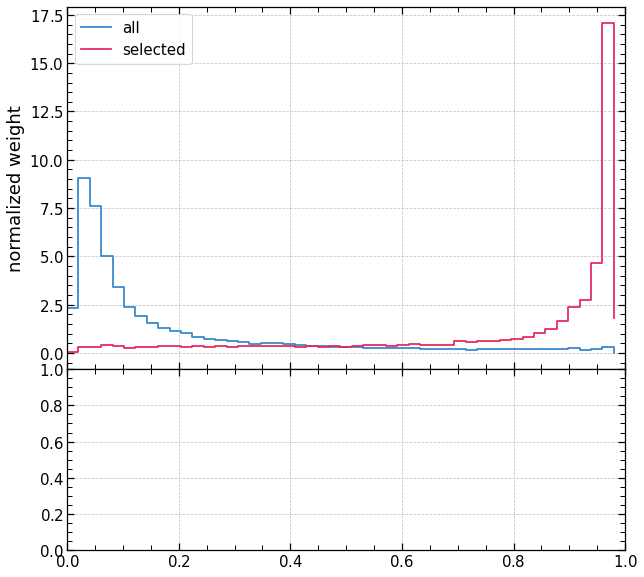

Incorporating bias "DESI:nnmag_grzw1w2w3w4" ...
magnitude histogramming: using user-supplied histogram for "DESI_nnmag_grzw1w2w3w4"


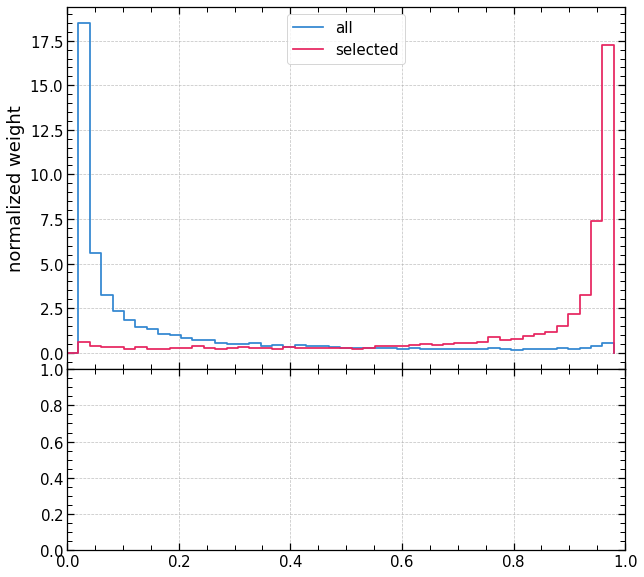


Computing final probabilities ...
    grouping by primary catalogue ID and flagging ...


In [4]:

nway_res_ero = nway.nwaylib.nway_match(
[ero_table, desi_table],
**nway_args
)


    adding angular separation columns
matching: 112369 matches after filtering by search radius
Primary catalogue "EROSITA" (8175), density gives 1.83e+07 objects on entire sky
Catalogue "DESI" (2418574), density gives 2.39e+09 objects on entire sky
Computing distance-based probabilities ...
    correcting for unrelated associations ...
100%|██████████| 8175/8175 [00:02<00:00, 3049.37it/s]
Incorporating bias "DESI:nnmag_grzw1w2" ...
magnitude histogramming: using user-supplied histogram for "DESI_nnmag_grzw1w2"


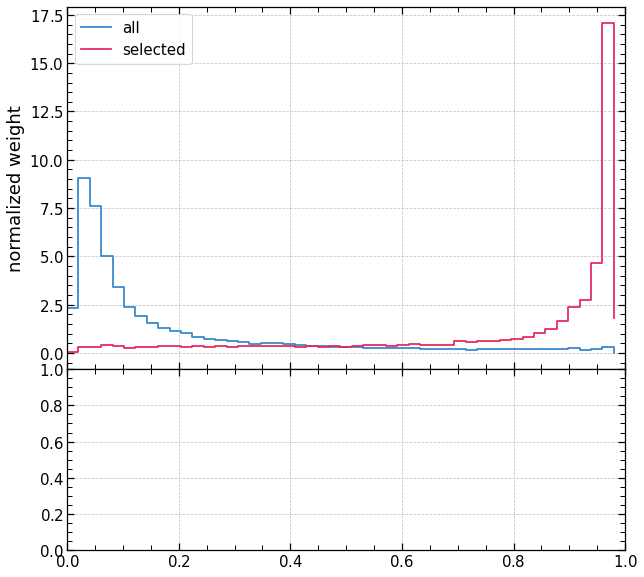

Incorporating bias "DESI:nnmag_grzw1w2w3w4" ...
magnitude histogramming: using user-supplied histogram for "DESI_nnmag_grzw1w2w3w4"


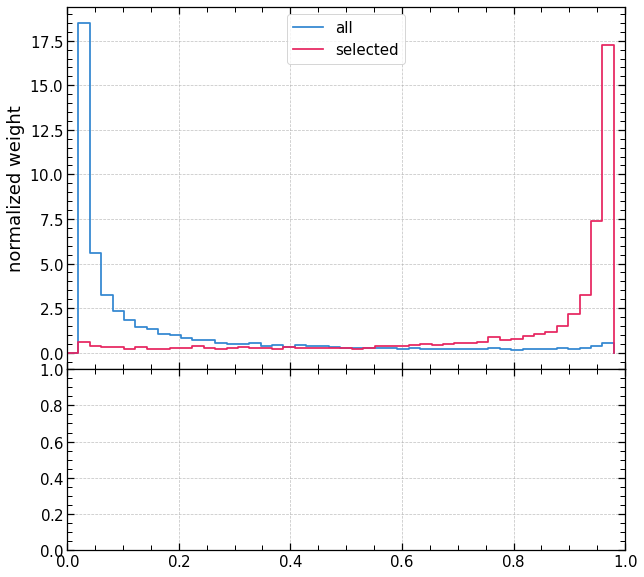


Computing final probabilities ...
    grouping by primary catalogue ID and flagging ...


In [5]:

nway_res_ero_random = nway.nwaylib.nway_match(
[ero_random_table, desi_table],
**nway_args
)


For a false detection rate of <5%
--> use only counterparts with p_any>0.75 (65.79% of matches)
The efficiency is 81.25%
The purity is  81.15%


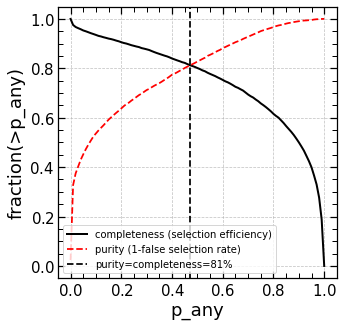

In [6]:
cutoffs, _, nway_purity = nway.calibrate_cutoff(nway_res_ero, nway_res_ero_random)

## Asses the performance of the NWAY with validation catalog (CSC & XMM)

In [7]:
nway_res_ero  = nway_res_ero.merge(ero_pandas, on='EROSITA')
nway_res_ero  = nway_res_ero.merge(desi_pandas, on='DESI')
nway_res_ero.sort_values(by=['EROSITA', 'prob_this_match' ], inplace=True, ascending=[True, False])
#nway_res_ero.to_pickle(data_path+'ERO_lhpv_03_23_sd01_a15_g14_nway_no_grz.pkl')

NWAY PERFOMANCE ON THE VALIDATION CATALOG
Completeness and purity for nway matching 
completeness = fraction of sources with prob_has_match > p 
purity = fraction of sources with prob_has_match > p and correct nway assignment
 Completeness = 94% 
 Purity = 94% 
 prob_has_match optimal cutoff =  0.5 
 Fraction of sources with prob_has_match > 0.5 = 81%
+++Statistics+++
687 X-ray sources in validation set with counterparts
--Out of those, 39 sources were assigned hostless (prob_has_match < 0.5) 
648 sources have prob_has_match > 0.5
Out of those 648: 
--610 sources have correct nway counterpart
--38 sources have incorrect nway counterpart


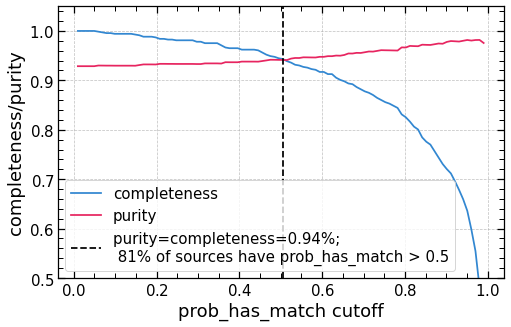

In [8]:
assess_goodnes_nway_cross_match(nway_res_ero);